# Student Alcohol Usage and Grades

In this notebook you will perform exploratory data analysis on a dataset from Kaggle about student alcohol usage, grades and other personal and family background information. The dataset can be found here:

https://www.kaggle.com/uciml/student-alcohol-consumption

This page also contains a description of the measured variables. After each visualization you will be asked to draw conclusions based on the visualization. You will write those conclusions in complete sentences. Imagine yourself presenting this notebook to the school board members, who are not intereste in code and data. Your conclusions should be written so that an audience such as this could make informed decisions from your analysis.

## Imports

In [1]:
import altair as alt
alt.enable_mime_rendering()
import pandas as pd

## Data

Here we import the data as a Pandas `DataFrame`:

In [2]:
students = pd.read_csv('/data/student-alcohol-consumption/student-mat.csv')

In [3]:
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
len(students)

395

In [5]:
students.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

## What things are correlated with alchohol usage?

The first things we will explore is alcohol usage. There are a number of variables in this dataset that may display covariation or correlation with alcohol usage. Before exploring these things, create a new variable for total alcohol usage (sum of the workday and weekend alcohol usage). Name this new column `Talc` in the `DataFrame` `Talc`:

In [6]:
students['Talc'] = students['Dalc'] + students['Walc']

In [7]:
assert 'Talc' in students.columns
assert students.Talc.dtype==int

In the next cell create a visualization that shows the variation of total alcohol usage:

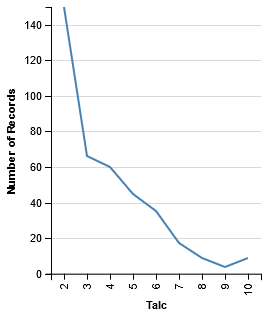

In [8]:
alt.Chart(students).mark_line().encode(
    alt.X('Talc:N'),
    alt.Y('count(*)')
)

In the next markdown cell describe your conclusions from this visualization in complete sentences:

It is most common for students to have a Talc of 2 (very low). The graph decreases until a Talc of 10, where it increases for the only time in the graph. This means that is is far more common for students to have a low weekly alcohol consumption.

In the next cell, create a visualization that helps answer the following question:

> Does internet access at home show covariation with alcohol usage?

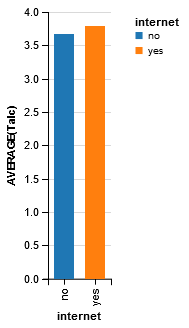

In [9]:
alt.Chart(students).mark_bar().encode(
    alt.X('internet'),
    alt.Y('average(Talc)'),
    alt.Color('internet')
)

In the next markdown cell describe your conclusions from this visualization in complete sentences:

The lines look nearly identical, so it does not look like there is a correlation.

In the next cell, create a visualization that helps answers the following question:

> Is going out with friends correlated with total alcohol usage? 

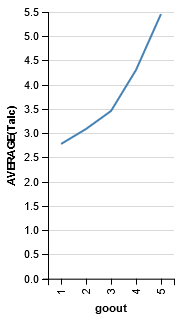

In [10]:
alt.Chart(students).mark_line().encode(
    alt.X('goout:O'),
    alt.Y('average(Talc)'),
)

In the next markdown cell describe your conclusions from this visualization in complete sentences:

If a student goes out more they are more likely to have a higher Talc.

In the next cell, create a visualization that helps answers the following question:

> What is the relationship between time spent studying and total alcohol usage? 

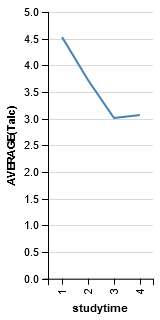

In [12]:
alt.Chart(students).mark_line().encode(
    alt.X('studytime:O'),
    alt.Y('average(Talc)')
)

In the next markdown cell describe your conclusions from this visualization in complete sentences:

If a student has a higher study time they are less likely to have a high Talc.

## What things are correlated with getting good grades?

In the next cell, create a visualization that helps answers the following question:

> How do student's plans to attend higher education correlate with their grades?

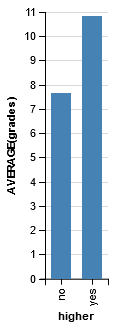

In [13]:
students['grades'] = (students['G1'] + students['G3'] + students['G2'])/3
alt.Chart(students).mark_bar().encode(
    alt.X('higher'),
    alt.Y('average(grades)')
)

In the next markdown cell describe your conclusions from this visualization in complete sentences:

Stuudents with plans to attend higher education have higher grades on average.

In the next cell, create a visualization that helps answers the following question:

> Does a student's mothers education show covariation with their grades?

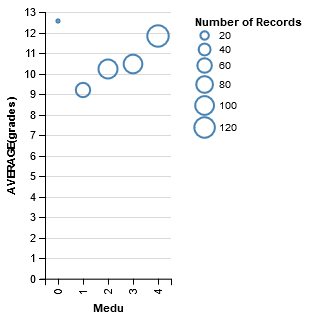

In [14]:
alt.Chart(students).mark_point().encode(
    alt.X('Medu:O'),
    alt.Y('average(grades)'),
    alt.Size('count(*)')
)

In the next markdown cell describe your conclusions from this visualization in complete sentences:

In general, as the mother's education increases, so does the student's grades. The mother's education level of 0 looks to be related to high grades, but this may be due to a low sample size.

In [15]:
print(len(students[students['Medu'] == 0]))

3
